In [1]:
import geopandas as gpd
import numpy as np
import pandas as pd
import folium
import matplotlib as plt
import json

In [2]:
#Datos itinerarios de última hasta mayo 2018

In [3]:
# Watch out! lines=True needed
BIKE_RIDES_DATASET= '.data/tour/201704_Usage_Bicimad.json'

#df = pd.read_json(BIKE_RIDES_DATASET, lines=True)


In [4]:
BIKE_RIDES_DATASET

'.data/tour/201704_Usage_Bicimad.json'

In [4]:
def read_json(filepath):
    if os.path.splitext(filepath)[1] != '.csv':
        return  # or whatever
    seps = [',', ';', '\t']                    # ',' is default
    encodings = [None, 'utf-8', 'ISO-8859-1']  # None is default
    for sep in seps:
        for encoding in encodings:
            try:
                return pd.read_csv(filepath, encoding=encoding, sep=sep)
            except Exception:  # should really be more specific 
                pass
    raise ValueError("{!r} is has no encoding in {} or seperator in {}".format(filepath, encodings, seps))

In [5]:
with open('.data/tour/201704_Usage_Bicimad.json', encoding='latin-1') as json_file:      
    data = json_file.readlines()
    # this line below may take at least 8-10 minutes of processing for 4-5 million rows. 
    # It converts all strings in list to actual json objects. 
    data = list(map(json.loads, data)) 

df = pd.DataFrame(data)

In [6]:
df_track = df.loc[df.track.notnull()]

In [7]:
df_track['track'][2]

{'type': 'FeatureCollection',
 'features': [{'geometry': {'type': 'Point',
    'coordinates': [-3.70870729972222, 40.425555]},
   'type': 'Feature',
   'properties': {'var': '28015,ES,Madrid,Madrid,CALLE NOVICIADO 7,Madrid',
    'speed': 5.52,
    'secondsfromstart': 132}},
  {'geometry': {'type': 'Point',
    'coordinates': [-3.71201159972222, 40.426343]},
   'type': 'Feature',
   'properties': {'var': '28015,ES,Madrid,Madrid,CALLE MANUEL 7,Madrid',
    'speed': 2.19,
    'secondsfromstart': 72}}]}

In [8]:
df_track.head()

,_id,user_day_code,idplug_base,user_type,idunplug_base,travel_time,idunplug_station,ageRange,idplug_station,unplug_hourTime,zip_code,track
2,{'$oid': '58e5e5e7865e9c221ca458b2'},877deab4cc256bb87e02abc1db75005ac2b66d65be8849...,5,1,5,171,15,4,16,{'$date': '2017-04-01T01:00:00.000+0200'},28053,"{'type': 'FeatureCollection', 'features': [{'g..."
3,{'$oid': '58e5e5e7865e9c221ca458b8'},91bbf6c3ba396f84cce4e96e59be42b0824a16c8a1bf89...,18,1,20,388,23,4,57,{'$date': '2017-04-01T01:00:00.000+0200'},28012,"{'type': 'FeatureCollection', 'features': [{'g..."
4,{'$oid': '58e5e5e7865e9c221ca458b9'},4476cabb023b8b4473e5b6e78a1a79e0ebc8910c8e9989...,2,1,2,381,23,4,43,{'$date': '2017-04-01T01:00:00.000+0200'},28042,"{'type': 'FeatureCollection', 'features': [{'g..."
5,{'$oid': '58e5e5e7865e9c221ca458ba'},b9c8654c6e2b11d3aa00b4fb242fc875940978cdc2e7b5...,6,1,3,299,23,3,43,{'$date': '2017-04-01T01:00:00.000+0200'},28005,"{'type': 'FeatureCollection', 'features': [{'g..."
6,{'$oid': '58e5e5e7865e9c221ca458bb'},322333231f000c59662af3d46b6c5f68ddf504e32a311b...,8,0,22,409,23,0,43,{'$date': '2017-04-01T01:00:00.000+0200'},,"{'type': 'FeatureCollection', 'features': [{'g..."


In [15]:
type(df_track['unplug_hourTime'][2]['$date'])

str

In [16]:
lista = [df_track['unplug_hourTime'][i]['$date'] for i in df_track.index]

In [19]:
df_track['pick_dates'] = [pd.Timestamp(i) for i in lista]

/home/fserrey/miniconda3/envs/myenv/lib/python3.6/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [20]:
df_track['pick_dates']

2        2017-04-01 01:00:00+02:00
3        2017-04-01 01:00:00+02:00
4        2017-04-01 01:00:00+02:00
5        2017-04-01 01:00:00+02:00
6        2017-04-01 01:00:00+02:00
                    ...           
253508   2017-04-30 23:00:00+02:00
253511   2017-04-30 23:00:00+02:00
253512   2017-04-30 23:00:00+02:00
253514   2017-04-30 23:00:00+02:00
253515   2017-04-30 23:00:00+02:00
Name: pick_dates, Length: 149702, dtype: datetime64[ns, pytz.FixedOffset(120)]

In [41]:
type(df_track['track'][2])

dict

In [42]:
df_with_tracks["track"][0]#["FeatureCollection"]["Features"]

{'type': 'FeatureCollection',
 'features': [{'geometry': {'type': 'Point',
    'coordinates': [-3.70870729972222, 40.425555]},
   'type': 'Feature',
   'properties': {'var': '28015,ES,Madrid,Madrid,CALLE NOVICIADO 7,Madrid',
    'speed': 5.52,
    'secondsfromstart': 132}},
  {'geometry': {'type': 'Point',
    'coordinates': [-3.71201159972222, 40.426343]},
   'type': 'Feature',
   'properties': {'var': '28015,ES,Madrid,Madrid,CALLE MANUEL 7,Madrid',
    'speed': 2.19,
    'secondsfromstart': 72}}]}

{'type': 'FeatureCollection',
 'features': [{'geometry': {'type': 'Point',
    'coordinates': [-3.70870729972222, 40.425555]},
   'type': 'Feature',
   'properties': {'var': '28015,ES,Madrid,Madrid,CALLE NOVICIADO 7,Madrid',
    'speed': 5.52,
    'secondsfromstart': 132}},
  {'geometry': {'type': 'Point',
    'coordinates': [-3.71201159972222, 40.426343]},
   'type': 'Feature',
   'properties': {'var': '28015,ES,Madrid,Madrid,CALLE MANUEL 7,Madrid',
    'speed': 2.19,
    'secondsfromstart': 72}}]}

In [51]:
def to_geojson(row):
    valid_geojson = {}
    geojson_features = row["FeatureCollection"]["Features"]
    valid_geojson["type"] = "FeatureCollection"
    valid_geojson["features"] = geojson_features
    return valid_geojson

df_with_tracks = df_track.copy()
df_with_tracks.reset_index(drop=True, inplace=True)
print(df_with_tracks.columns)
df_with_tracks["GeoJSON"] = df_with_tracks['track']

Index(['_id', 'user_day_code', 'idplug_base', 'user_type', 'idunplug_base',
       'travel_time', 'idunplug_station', 'ageRange', 'idplug_station',
       'unplug_hourTime', 'zip_code', 'track'],
      dtype='object')


In [56]:
df_with_tracks.sort_values(by=['travel_time'], ascending=False)[["user_type", "travel_time", "GeoJSON"]]

df_bike = df_with_tracks[df_with_tracks['user_type'] == 1].sort_values(by=['travel_time'], ascending=False).iloc[1600]["GeoJSON"]
# We keep type 1 because are our main target here

with open("df_bike.json", "wb") as f:
    f.write(json.dumps(df_bike).encode("utf-8"))

In [57]:
dfg = gpd.read_file('df_bike.json')

In [59]:
dfg.shape

(12, 4)

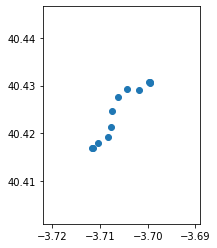

In [60]:
dfg.plot()

In [66]:
mapa = folium.Map(location=[40.417000, -3.703000], zoom_start=14)
file = 'df_bike.json'

# 2 possibilities I tried:
folium.GeoJson(file,name='geojson').add_to(mapa)

mapa

In [ ]:
# Aggregate these points with the GroupBy
df = df.groupby(['entity_id'])['geometry'].apply(lambda x: LineString(x.tolist()))
df = GeoDataFrame(df, geometry='geometry')

In [4]:
df = pd.io.json.json_normalize(df['unplug_hourTime'][0])
df = pd.io.json.json_normalize(df['unplug_hourTime'][0])

df.head()

,_id,user_day_code,idplug_base,user_type,idunplug_base,travel_time,idunplug_station,ageRange,idplug_station,unplug_hourTime,zip_code,track
0,{'$oid': '58e5e5e7865e9c221ca45898'},df843a74bba22d2b363e4e96f74b99391276e71dfea92e...,17,1,1,169,41,4,50,{'$date': '2017-04-01T01:00:00.000+0200'},28005,NaN
1,{'$oid': '58e5e5e7865e9c221ca458a7'},6a7cf4393301d25f5a2eeaff8c7ba5d406f514ebd086aa...,2,1,14,271,95,5,90,{'$date': '2017-04-01T01:00:00.000+0200'},28043,NaN
2,{'$oid': '58e5e5e7865e9c221ca458b2'},877deab4cc256bb87e02abc1db75005ac2b66d65be8849...,5,1,5,171,15,4,16,{'$date': '2017-04-01T01:00:00.000+0200'},28053,"{'type': 'FeatureCollection', 'features': [{'g..."
3,{'$oid': '58e5e5e7865e9c221ca458b8'},91bbf6c3ba396f84cce4e96e59be42b0824a16c8a1bf89...,18,1,20,388,23,4,57,{'$date': '2017-04-01T01:00:00.000+0200'},28012,"{'type': 'FeatureCollection', 'features': [{'g..."
4,{'$oid': '58e5e5e7865e9c221ca458b9'},4476cabb023b8b4473e5b6e78a1a79e0ebc8910c8e9989...,2,1,2,381,23,4,43,{'$date': '2017-04-01T01:00:00.000+0200'},28042,"{'type': 'FeatureCollection', 'features': [{'g..."
